In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [2]:

# Step 1: Create fake increasing sales data
np.random.seed(42)
days = pd.date_range(start='2024-01-01', periods=20)
sales = pd.Series([100 + i*5 + np.random.normal() for i in range(20)], index=days)


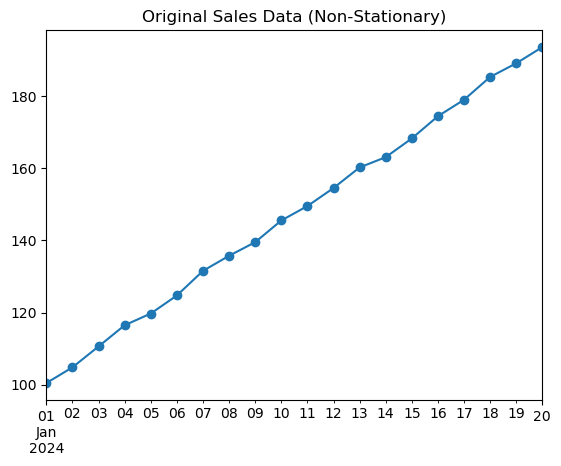

In [3]:

# Plot original data
sales.plot(title='Original Sales Data (Non-Stationary)', marker='o')
plt.show()


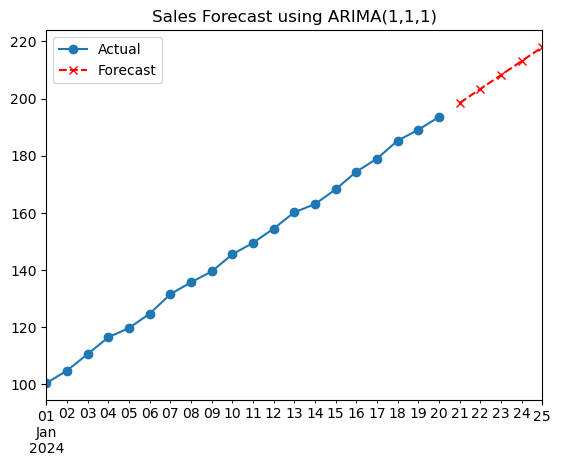

In [4]:

# Step 2: Apply ARIMA (p=1, d=1, q=1)
model = ARIMA(sales, order=(1, 1, 1))
model_fit = model.fit()

# Step 3: Forecast next 5 days
forecast = model_fit.forecast(steps=5)

# Step 4: Plot original + forecast
sales.plot(label='Actual', marker='o')
forecast.index = pd.date_range(start=sales.index[-1] + pd.Timedelta(days=1), periods=5)
forecast.plot(label='Forecast', marker='x', linestyle='--', color='red')
plt.title('Sales Forecast using ARIMA(1,1,1)')
plt.legend()
plt.show()


In [5]:

# Optional: Print forecast values
print("Forecasted Sales:")
print(forecast)


Forecasted Sales:
2024-01-21    198.473669
2024-01-22    203.359637
2024-01-23    208.245601
2024-01-24    213.131561
2024-01-25    218.017518
Freq: D, Name: predicted_mean, dtype: float64
